<a href="https://colab.research.google.com/github/haqturrr/CAPSTONE/blob/main/Copy_of_Corrosion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.1/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JvavsXa7gjQossuBct25")
project = rf.workspace("cawilai-interns-july-2023").project("corrosion-instance-segmentation-sfcpc")
version = project.version(16)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

[Errno 2] No such file or directory: '{HOME}'
/content/{HOME}/datasets
100% 22.8M/22.8M [00:00<00:00, 230MB/s]
New https://pypi.org/project/ultralytics/8.3.137 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/{HOME}/datasets/Corrosion-Instance-Segmentation-16/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, sour

/content/{HOME}/datasets


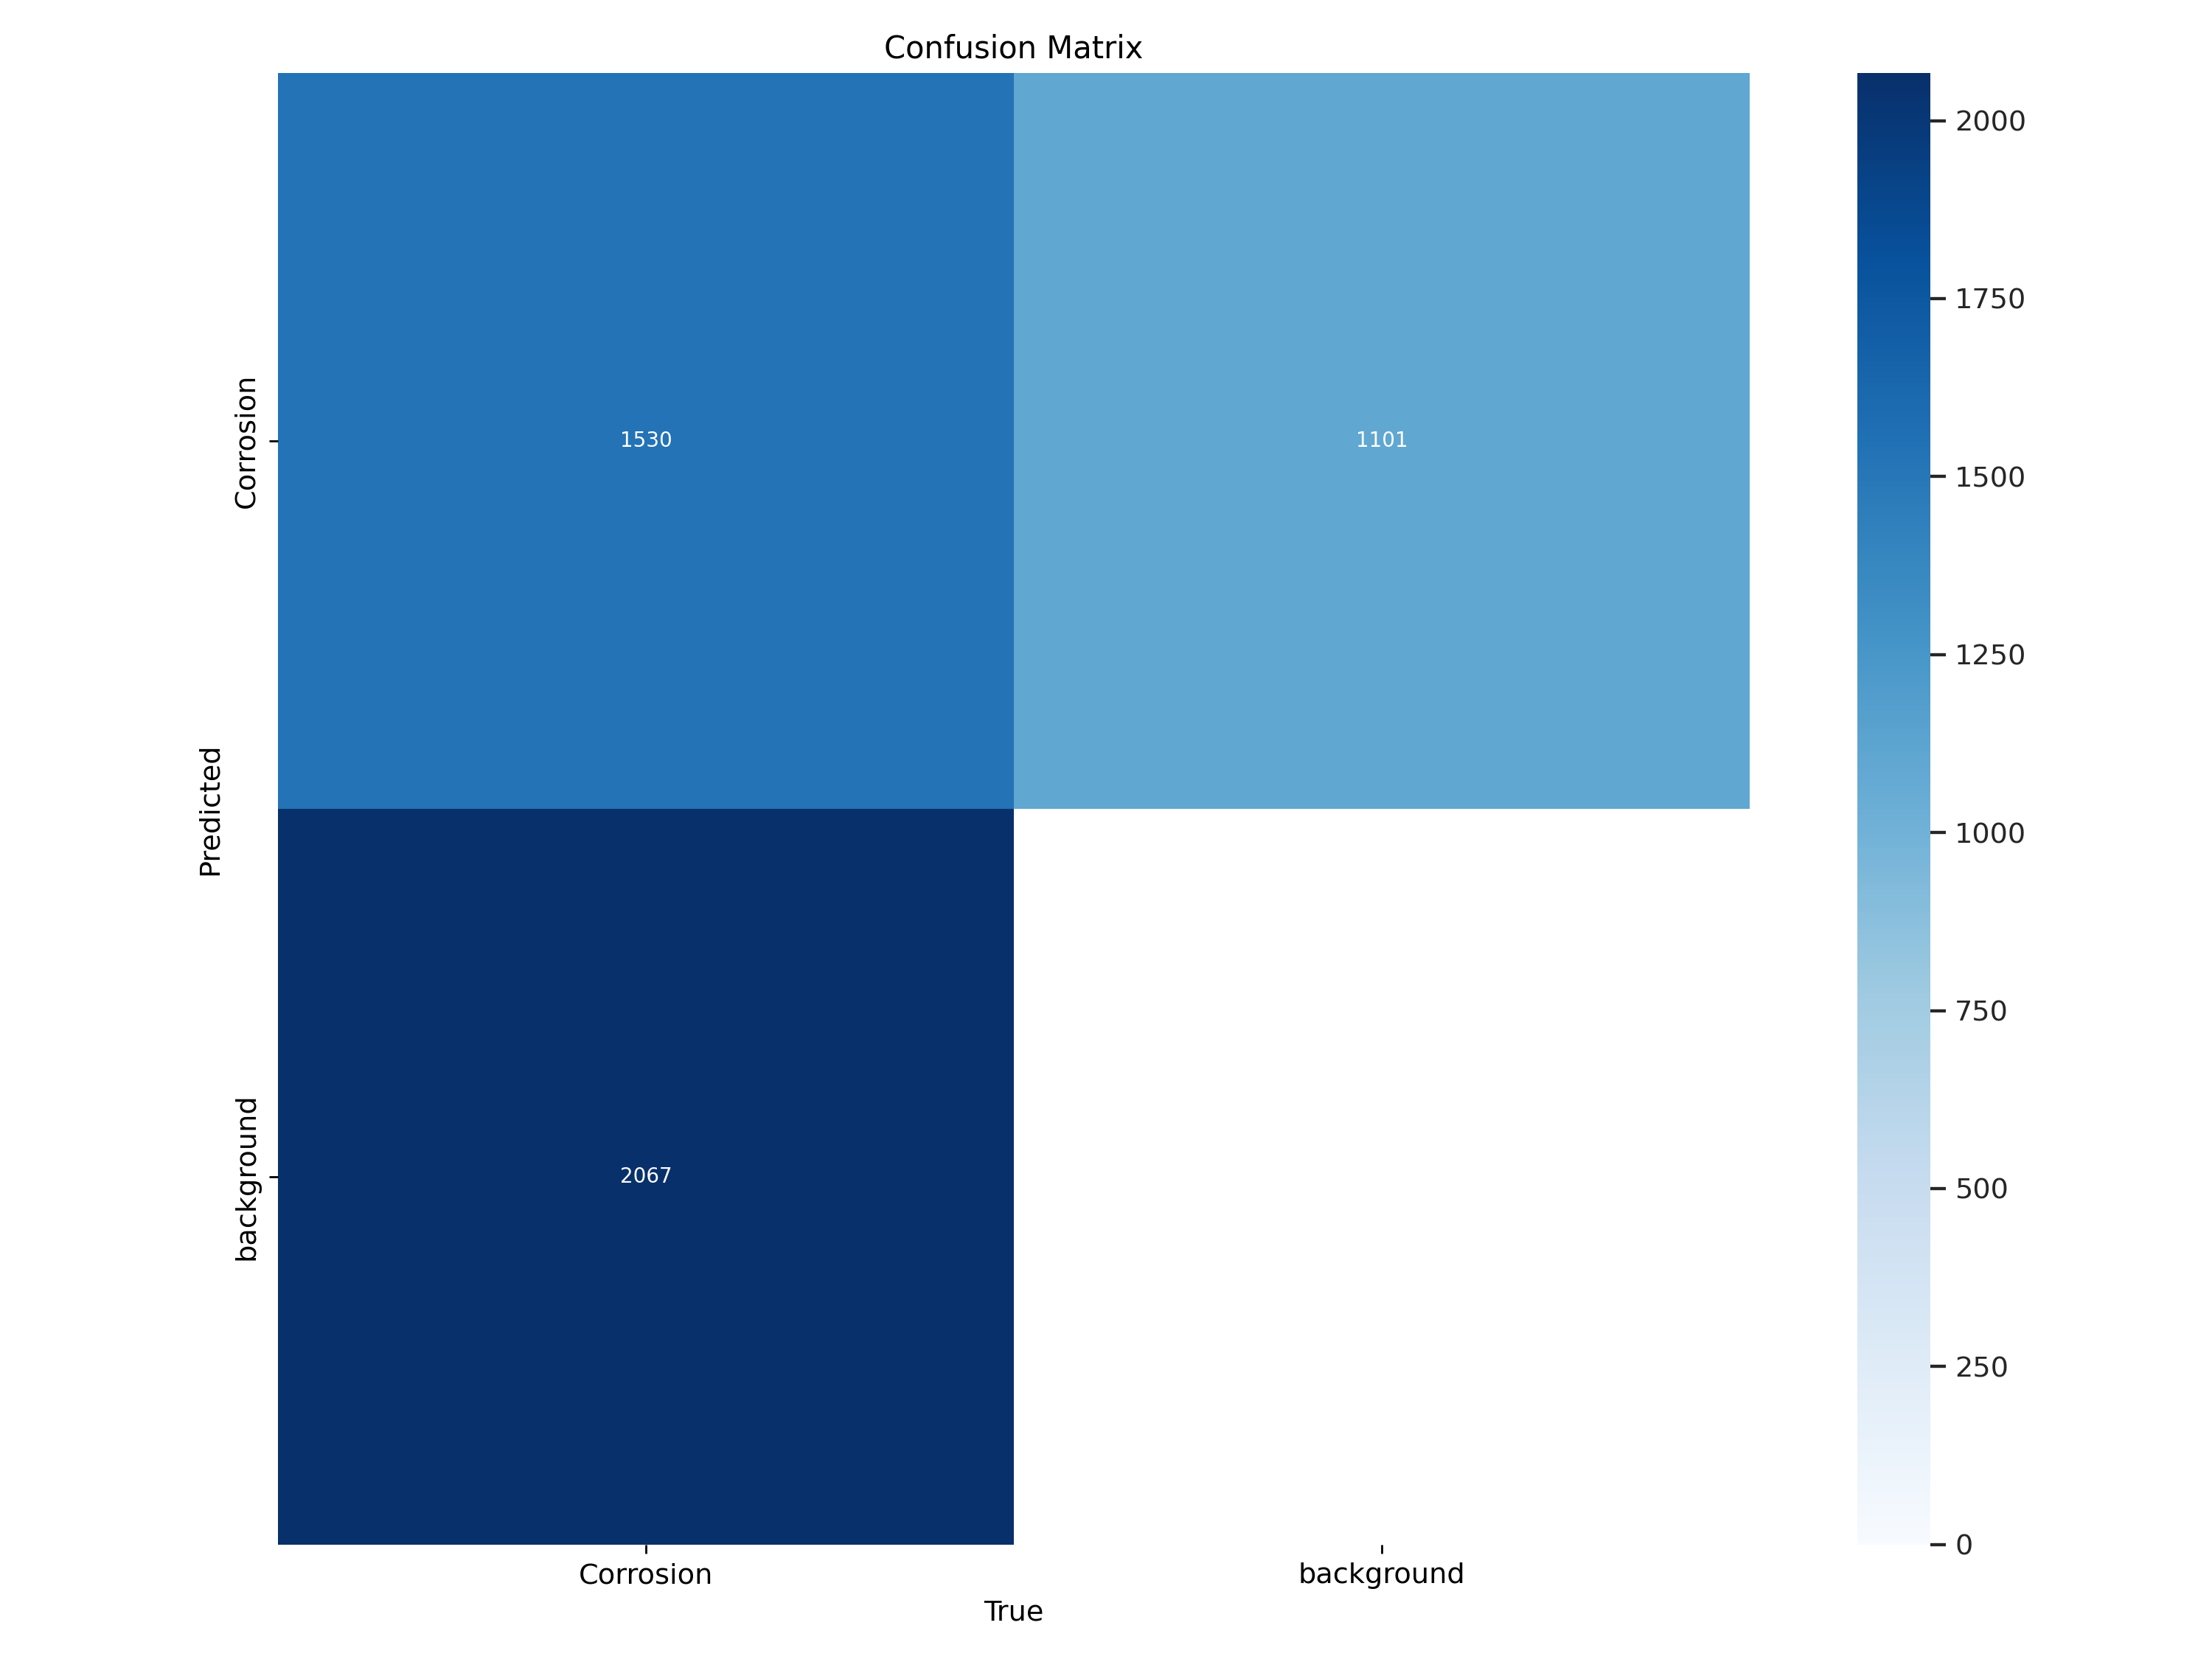

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content/{HOME}/datasets


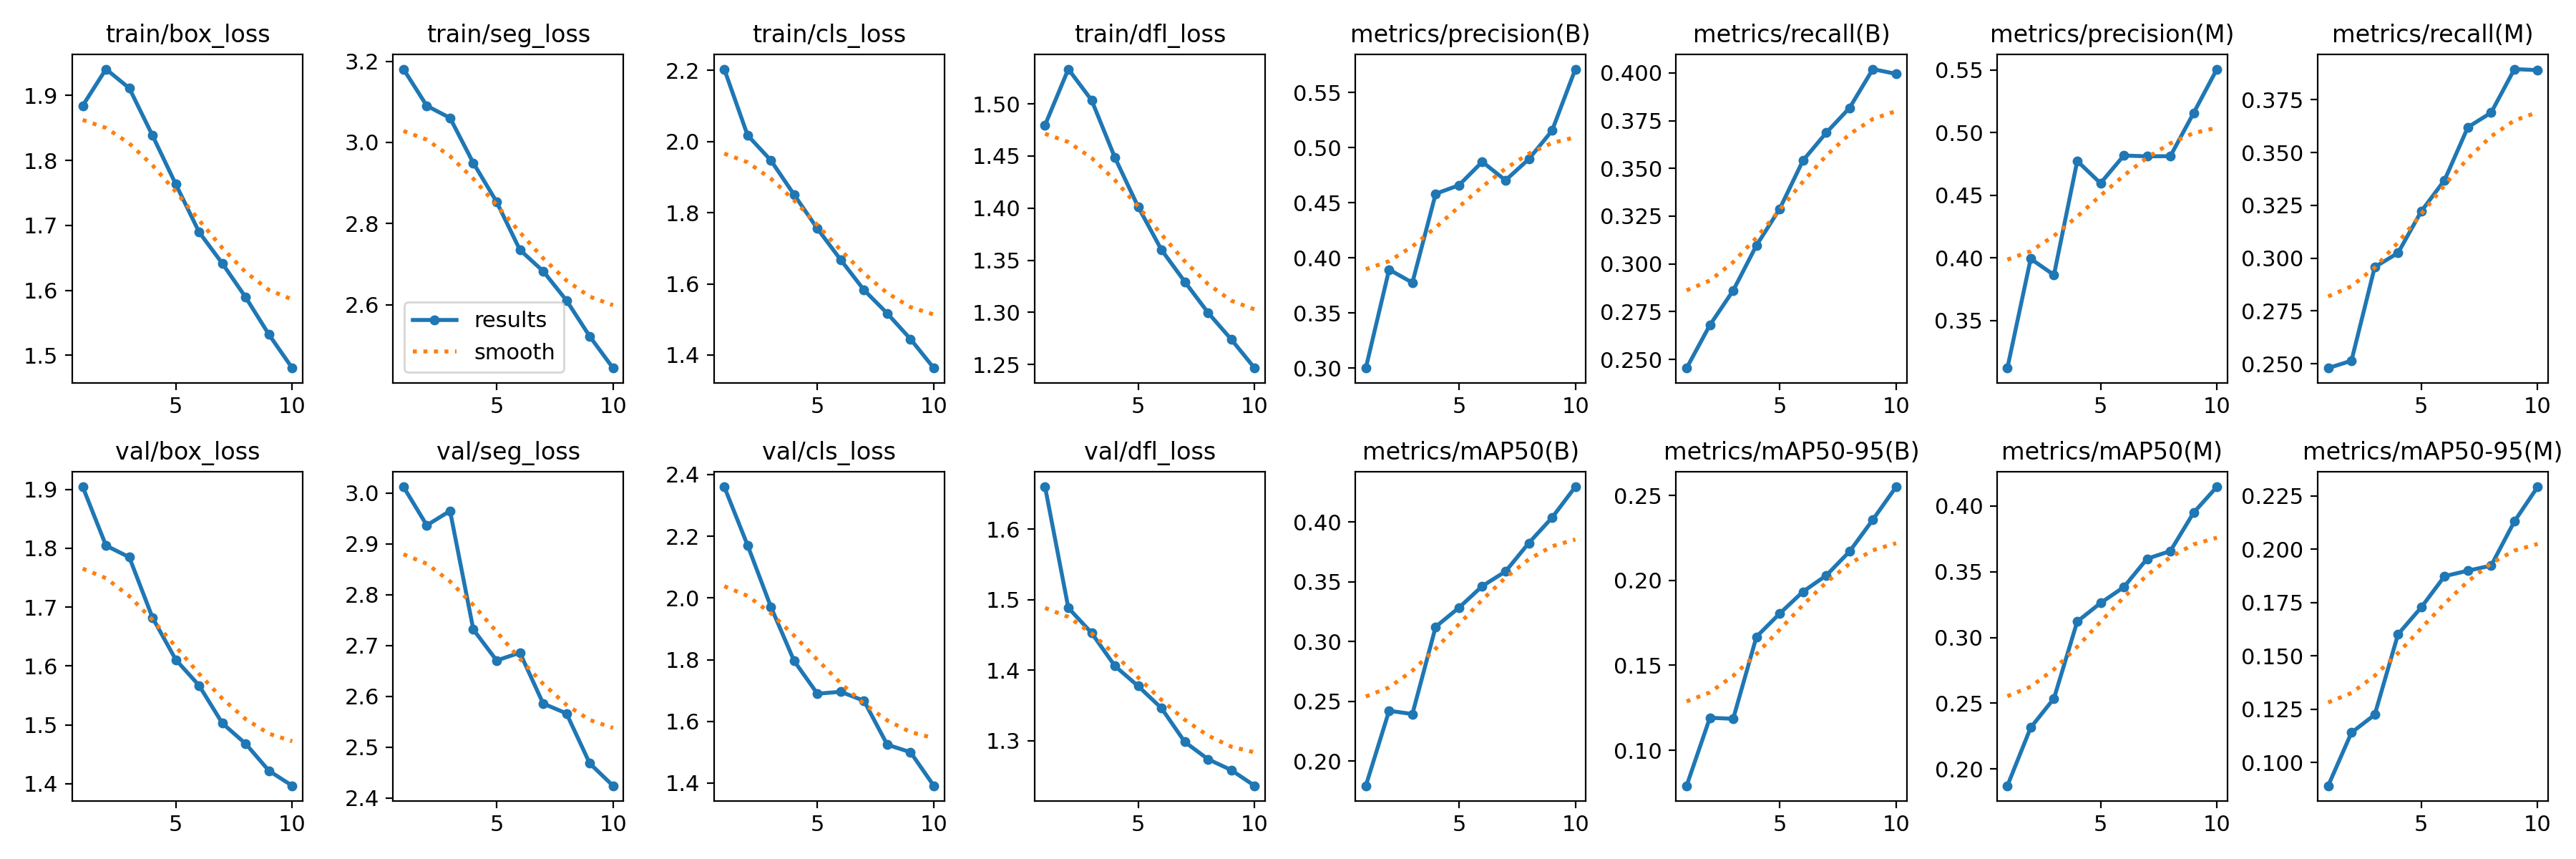

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content/{HOME}/datasets


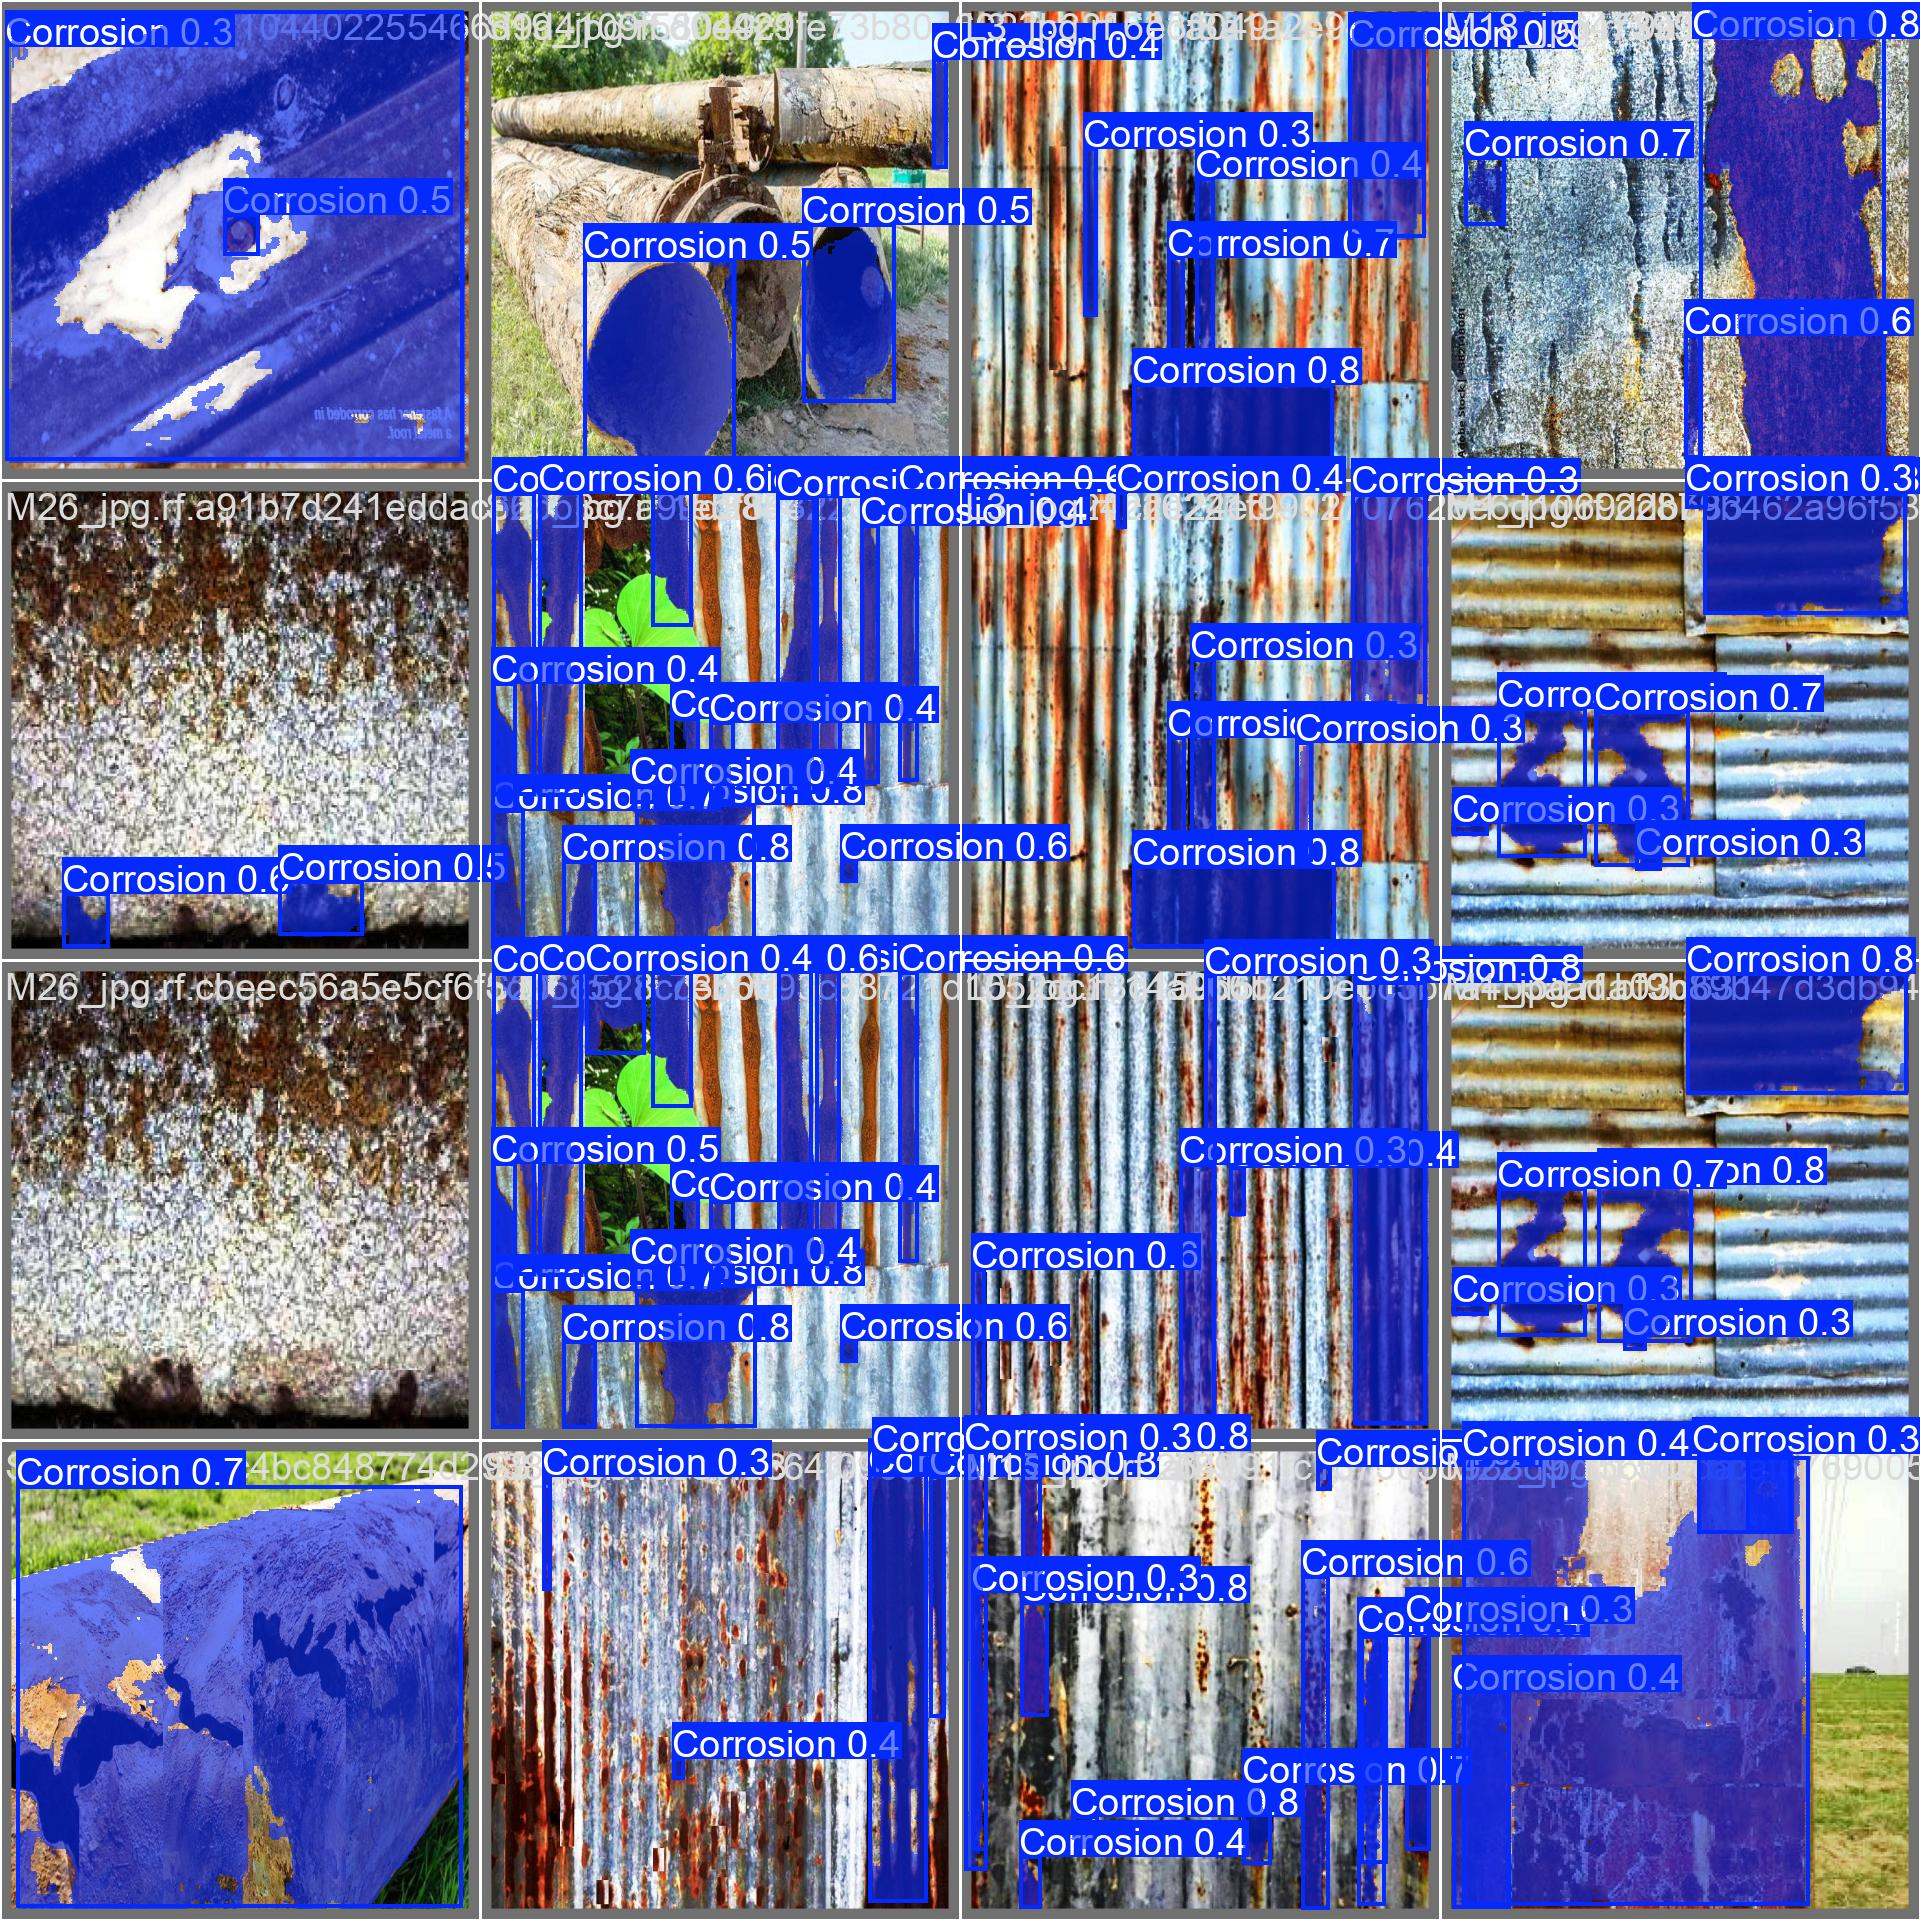

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content/{HOME}/datasets
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/{HOME}/datasets/Corrosion-Instance-Segmentation-16/valid/labels.cache... 412 images, 0 backgrounds, 0 corrupt: 100% 412/412 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  54% 14/26 [00:09<00:08,  1.46it/s]
Exception in thread Thread-2 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.11/dist-packages/sentry_sdk/integrations/threading.py", line 130, in run
    return _run_old_run_func()
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sentry_sdk/integrations/threading.py", line 125, in _run_old_run_func
    rer

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content/{HOME}/datasets
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

image 1/205 /content/{HOME}/datasets/Corrosion-Instance-Segmentation-16/test/images/000143_png.rf.e80ab98e269ce4a6e6c9226a097bf1d5.jpg: 640x640 1 Corrosion, 20.9ms
image 2/205 /content/{HOME}/datasets/Corrosion-Instance-Segmentation-16/test/images/000145_jpg.rf.b28bb7c3cce6d8027f9f453dde4a94e5.jpg: 640x640 2 Corrosions, 20.8ms
image 3/205 /content/{HOME}/datasets/Corrosion-Instance-Segmentation-16/test/images/000347_png.rf.bfa288a1c3aaf62c3b3d9b6925331d7b.jpg: 640x640 12 Corrosions, 20.8ms
image 4/205 /content/{HOME}/datasets/Corrosion-Instance-Segmentation-16/test/images/000347_png.rf.f14f540603e02907a3fc66b5dca3e2c2.jpg: 640x640 14 Corrosions, 20.8ms
image 5/205 /content/{HOME}/datasets/Corrosion-Instance-Segmentation-16/test/images/000386_jpg.rf.e4ac65d3bf930212770869b5ba759166.jpg: 

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")